In [1]:
import re
import cv2
import random
from scipy import signal
import scipy as sp
import scipy.ndimage
import numpy as np
import typing as t
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as k

import config as c
import utils.image_processing as ipr
import utils.model as model_factory
from utils.dataset import get_train_data, get_test_data

plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
x, y = get_train_data()
x = np.array(x)
y = np.array(y)[:, 1].reshape((-1, 1)).astype(np.float)
r = model.predict(x)

y=y.reshape(-1)
r=r.reshape(-1)

100%|██████████| 6646/6646 [00:25<00:00, 257.13it/s]


In [3]:
model = k.models.load_model('model.h5')

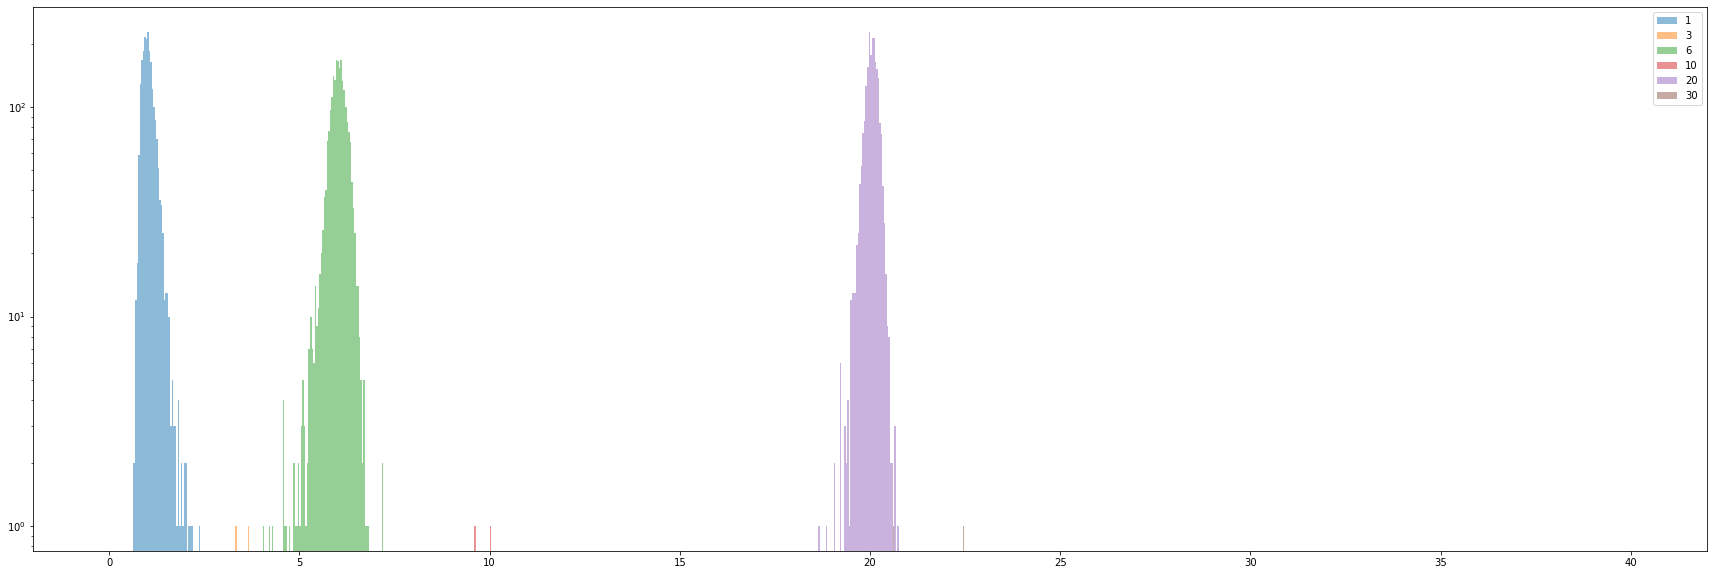

In [4]:
plt.rcParams["figure.figsize"] = (30, 10)
#plt.hist(r.reshape(-1), log=True, bins=300, alpha=0.5)

for k in [1, 3, 6, 10, 20, 30]:
    plt.hist(r[y==k], log=True, bins=1000, range=(0, 40), alpha=0.5, label=str(k))
plt.legend()

plt.show()

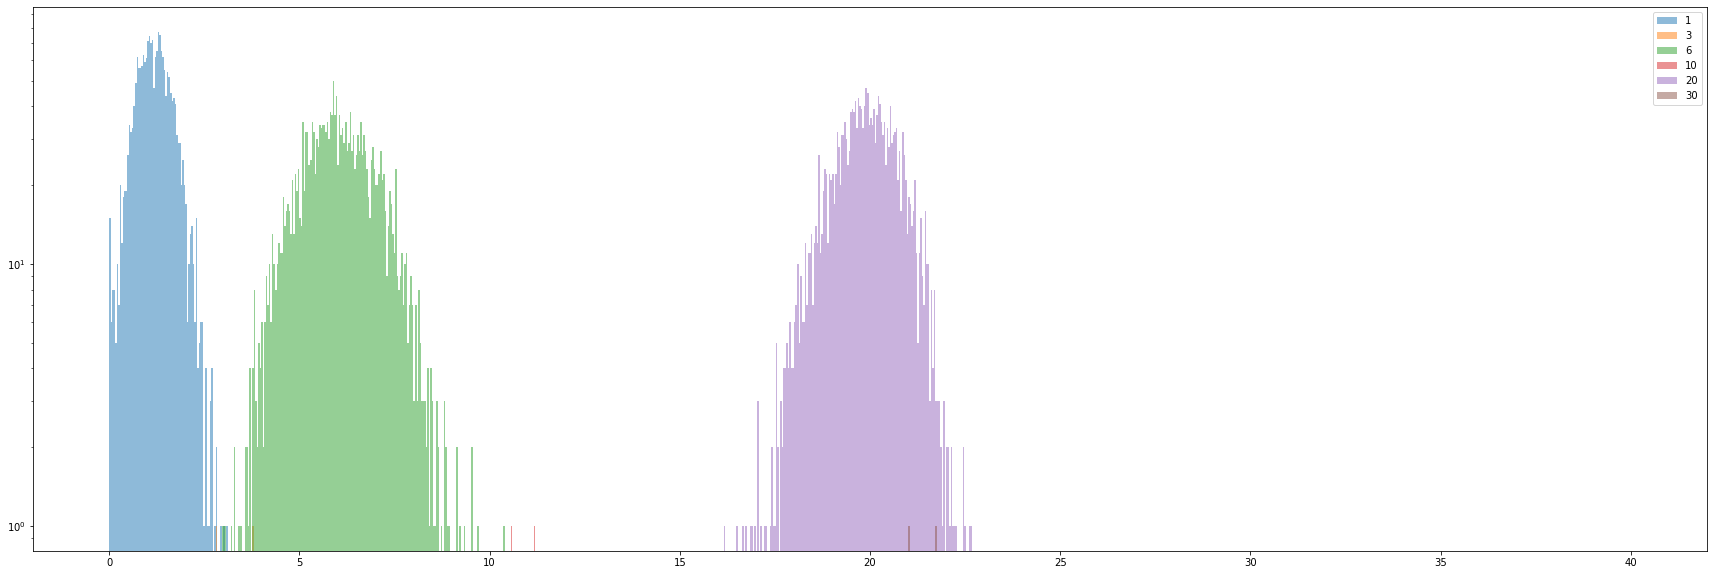

In [21]:
plt.rcParams["figure.figsize"] = (30, 10)
#plt.hist(r.reshape(-1), log=True, bins=300, alpha=0.5)

for k in [1, 3, 6, 10, 20, 30]:
    plt.hist(r[y==k], log=True, bins=1000, range=(0, 40), alpha=0.5, label=str(k))
plt.legend()

plt.show()

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [9]:
r = model.predict(x)

In [5]:
x, y = get_train_data()
df = pd.DataFrame(data=y, columns=['reaction_type', 'energy', 'offset'])
df['img'] = x

100%|██████████| 100/100 [00:00<00:00, 413.22it/s]


In [3]:
x = get_test_data()
test_df = pd.DataFrame(data=np.zeros(len(x)), columns=['img'])
test_df['img'] = x

100%|██████████| 1502/1502 [00:07<00:00, 201.60it/s]


In [178]:
df.head(10)

,reaction_type,energy,offset,img
0,ER,30,-0.003019,"[[103.0, 105.0, 96.0, 100.0, 100.0, 101.0, 98...."
1,ER,3,-0.003108,"[[101.0, 99.0, 101.0, 104.0, 100.0, 101.0, 97...."
2,ER,3,-0.003242,"[[100.0, 106.0, 100.0, 103.0, 96.0, 101.0, 101..."
3,ER,10,-0.003277,"[[101.0, 102.0, 99.0, 98.0, 95.0, 99.0, 107.0,..."
4,ER,3,-0.004240,"[[96.0, 91.0, 100.0, 100.0, 97.0, 105.0, 105.0..."
5,ER,3,-0.005812,"[[98.0, 97.0, 99.0, 104.0, 100.0, 99.0, 107.0,..."
6,ER,3,-0.005915,"[[99.0, 92.0, 99.0, 103.0, 99.0, 101.0, 105.0,..."
7,ER,10,-0.006595,"[[103.0, 97.0, 101.0, 103.0, 99.0, 97.0, 101.0..."
8,ER,10,-0.006796,"[[104.0, 97.0, 103.0, 101.0, 103.0, 99.0, 107...."
9,ER,30,-0.007106,"[[102.0, 101.0, 98.0, 99.0, 98.0, 100.0, 104.0..."


In [11]:
np.arange((3, 3))

TypeError: arange: scalar arguments expected instead of a tuple.

In [22]:
dist=np.mgrid[0:576:1, 0:576:1] - 288
dist = np.sum(dist**2, axis=0)**0.5

In [ ]:
plt.hist(np.sum(df['img'][0:10], axis=0).reshape(-1)/10, bins=300, range=(95, 105))
plt.plot()

In [6]:
s=[]
for i in range(6400):
    s.append(np.sum(df['img'][i][0:72,0:72]/256))
print(np.std(s))

2.0368586


In [7]:
s=[]
for i in range(6400):
    s.append(np.sum(df['img'][i][0:72*2,0:72*8]/256))
print(np.std(s))

10.724252


In [8]:
df['img'][index][0:50,0:50].reshape(-1)

NameError: name 'index' is not defined

[]

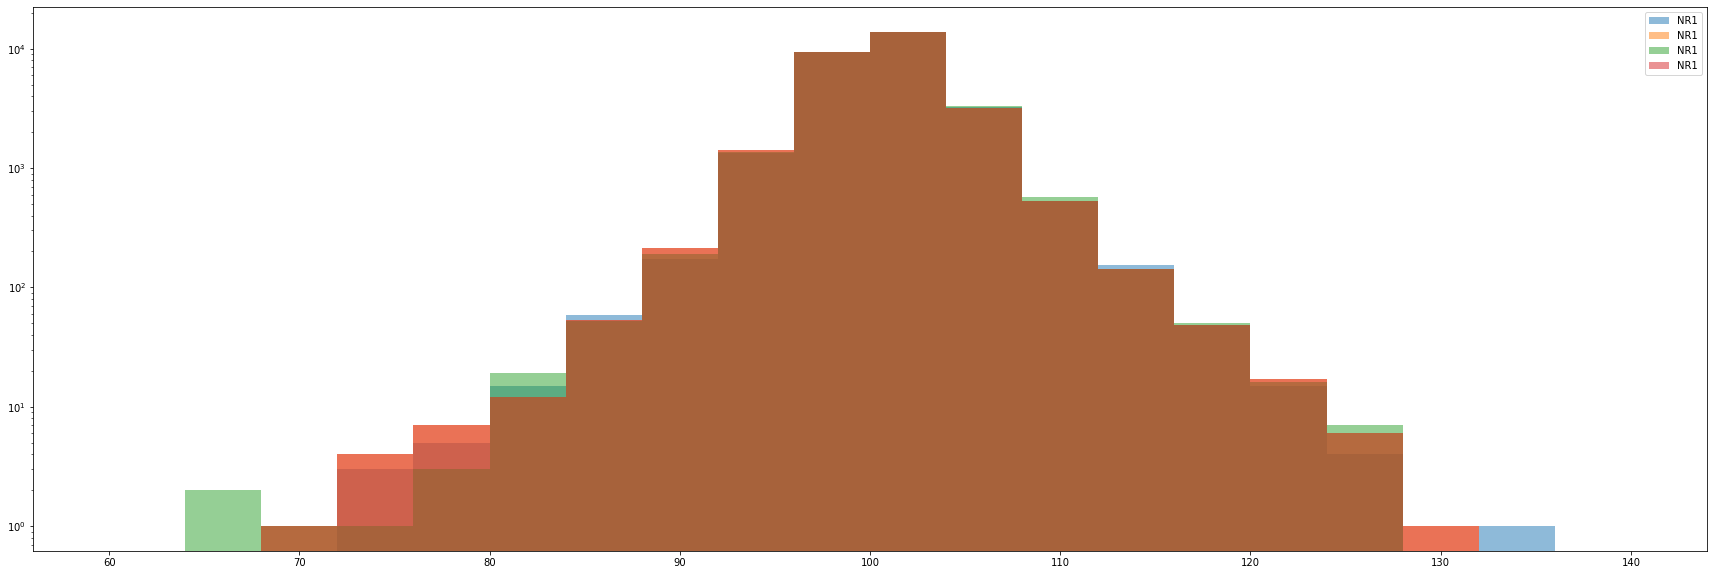

In [9]:
indexs = [6769, 6787, 6778, 6787]
for index in indexs:
    plt.hist(df['img'][index][0:50].reshape(-1), log=True, bins=20, range=(60, 140), alpha=0.5, label=df['reaction_type'][index]+str(df['energy'][index]))
plt.legend()
plt.plot()

In [10]:
s=0
for i in range(1000):
    s+=np.sum(df['img'][i][0:20,0:20]/256)
s/=1000
print(s)

156.86368359375


In [11]:
df[(df['energy']==20)&(df.reaction_type=='NR')].index

Int64Index([ 6759,  6760,  6761,  6762,  6763,  6765,  6766,  6768,  6770,
             6776,
            ...
            13366, 13377, 13381, 13382, 13386, 13390, 13392, 13396, 13400,
            13401],
           dtype='int64', length=2208)

In [12]:
indexs = [6764, 6775, 8212, 11566, 6758, 13389, 7751, 12596, 6765, 13366, 11126, 9910]
for index in indexs:
    v = (np.sum(df['img'][index][275:305, 275:305]/256) - 352)/2
    print(df['reaction_type'][index]+str(df['energy'][index]), '\t', str(v), '\t', index)

NR1 	 1.126953125 	 6764
NR1 	 0.712890625 	 6775
NR3 	 3.0078125 	 8212
NR3 	 2.873046875 	 11566
NR6 	 5.23828125 	 6758
NR6 	 4.984375 	 13389
NR10 	 9.4375 	 7751
NR10 	 9.224609375 	 12596
NR20 	 21.93359375 	 6765
NR20 	 20.73046875 	 13366
NR30 	 31.529296875 	 11126
NR30 	 25.513671875 	 9910


In [13]:
df['v'] = df['img'].map(lambda img: (np.sum(img[275:305, 275:305]/256) - 352)/2)
#df['v'] = df['img'].map(lambda img: (np.sum(img[285:295, 285:295]/256) - 352/10)/2)

In [14]:
df[df.reaction_type=='NR'][['energy', 'v']].corr()

,energy,v
energy,1.000000,0.991276
v,0.991276,1.000000


<AxesSubplot:>

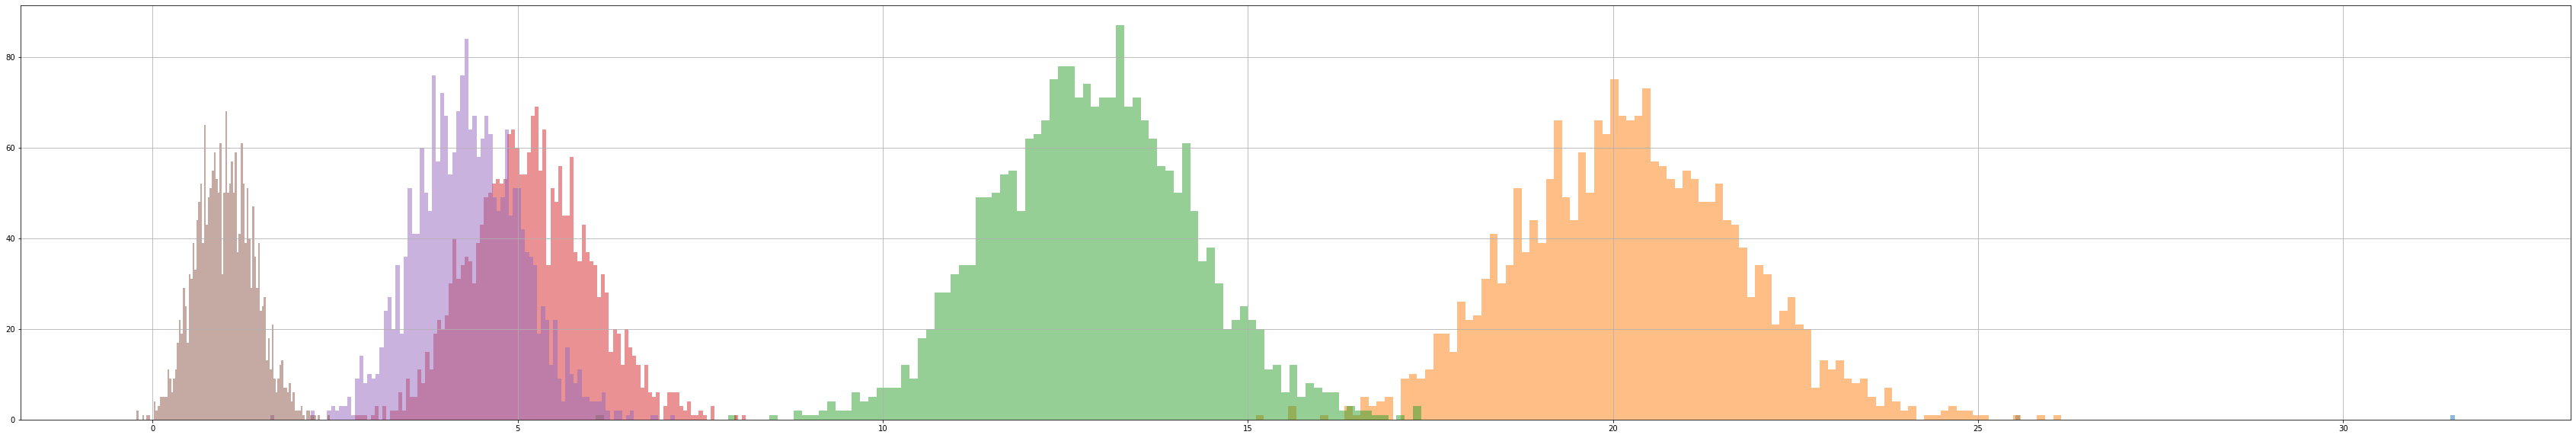

In [199]:
df[(df['energy']==30)&(df.reaction_type=='NR')]['v'].hist(bins=100, alpha=0.5)
df[(df['energy']==20)&(df.reaction_type=='NR')]['v'].hist(bins=100, alpha=0.5)
df[(df['energy']==10)&(df.reaction_type=='ER')]['v'].hist(bins=100, alpha=0.5)
df[(df['energy']==6)&(df.reaction_type=='NR')]['v'].hist(bins=100, alpha=0.5)
df[(df['energy']==3)&(df.reaction_type=='ER')]['v'].hist(bins=100, alpha=0.5)
df[(df['energy']==1)&(df.reaction_type=='NR')]['v'].hist(bins=100, alpha=0.5)

In [19]:
df[(df['energy']==20)&(df.reaction_type=='NR')&(df.v<16)]

,reaction_type,energy,offset,img,v
6872,NR,20,-0.1120,"[[103.0, 103.0, 99.0, 100.0, 101.0, 98.0, 104....",15.585938
6900,NR,20,-0.1412,"[[101.0, 97.0, 101.0, 101.0, 103.0, 96.0, 97.0...",15.638672
9042,NR,20,-2.1445,"[[101.0, 98.0, 102.0, 101.0, 94.0, 98.0, 94.0,...",15.111328
12119,NR,20,1.9535,"[[102.0, 101.0, 99.0, 101.0, 98.0, 103.0, 96.0...",15.613281


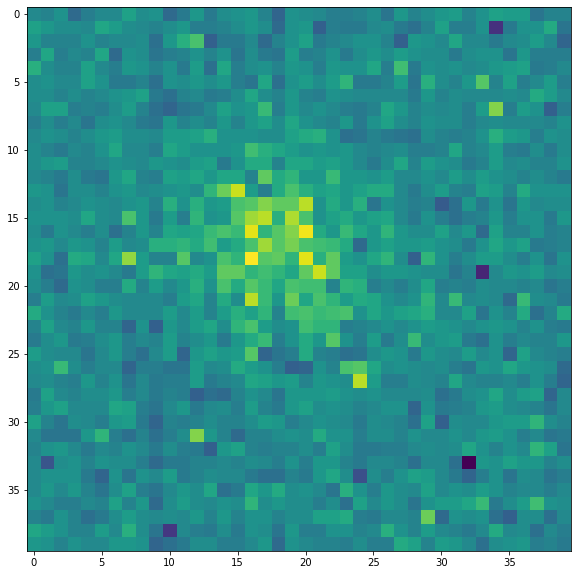

In [300]:
def image_preprocessing(image):
    image = image[270:310, 270:310]/256
    #image = sp.ndimage.filters.gaussian_filter(image, [1.0, 1.0], mode='constant')
    #image = np.array(image) ** 30
    
    #image = (image > np.quantile(image, 0.7)) * image + (image <= np.quantile(image, 0.7))*np.quantile(image, 0.7)
    #image = sp.ndimage.filters.gaussian_filter(image, [5.0, 5.0], mode='constant')
    #image = np.array(image) ** 20


    #image = image[0:100, 0:100]
    #image = np.sum(np.gradient(image), axis=0) + image
    #image[0, 0] = 0.005
    #image = image / np.max(image)*256
    #image = image - np.min(image)
    return image / 1e-20

df['img_p'] = df['img'].map(lambda img: image_preprocessing(img))

df['max'] = df['img_p'].map(lambda img_p: np.max(img_p))
df['img_p'] /= np.max(df['max'])
df['max'] = df['img_p'].map(lambda img_p: np.max(img_p))
plt.imshow(df['img_p'][2])

In [297]:
np.sum(df['img_p'][2])

6.114512e+22

In [295]:
np.sum(df['img_p'][2])

6.340039e+22

In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(40, 100))
for j, energy in enumerate([1, 3, 6, 10, 20, 30]):
    for i, reaction_type in enumerate(['NR', 'ER']):
        df_c = df[(df['energy']==energy)&(df.reaction_type==reaction_type)]
        c_min = df_c['max'].min()
        c_max = df_c['max'].max()
        
        argmax = df_c['max'].argmax()
        argmin = df_c['max'].argmin()
        print(argmax)
        print(df_c['max'].iloc[argmax])
        
        print(reaction_type+str(energy), c_min, '\t', c_max)
        
        axs[j, i].hist(df_c['img_p'].iloc[argmax].reshape(-1), log=True, bins=20, alpha=0.5, range=(0, c_max))
        axs[j, i].hist(df_c['img_p'].iloc[argmin].reshape(-1), log=True, bins=20, alpha=0.5, range=(0, c_max))
        axs[j, i].set_title(reaction_type+str(energy))
    print()
    
plt.plot()

[]

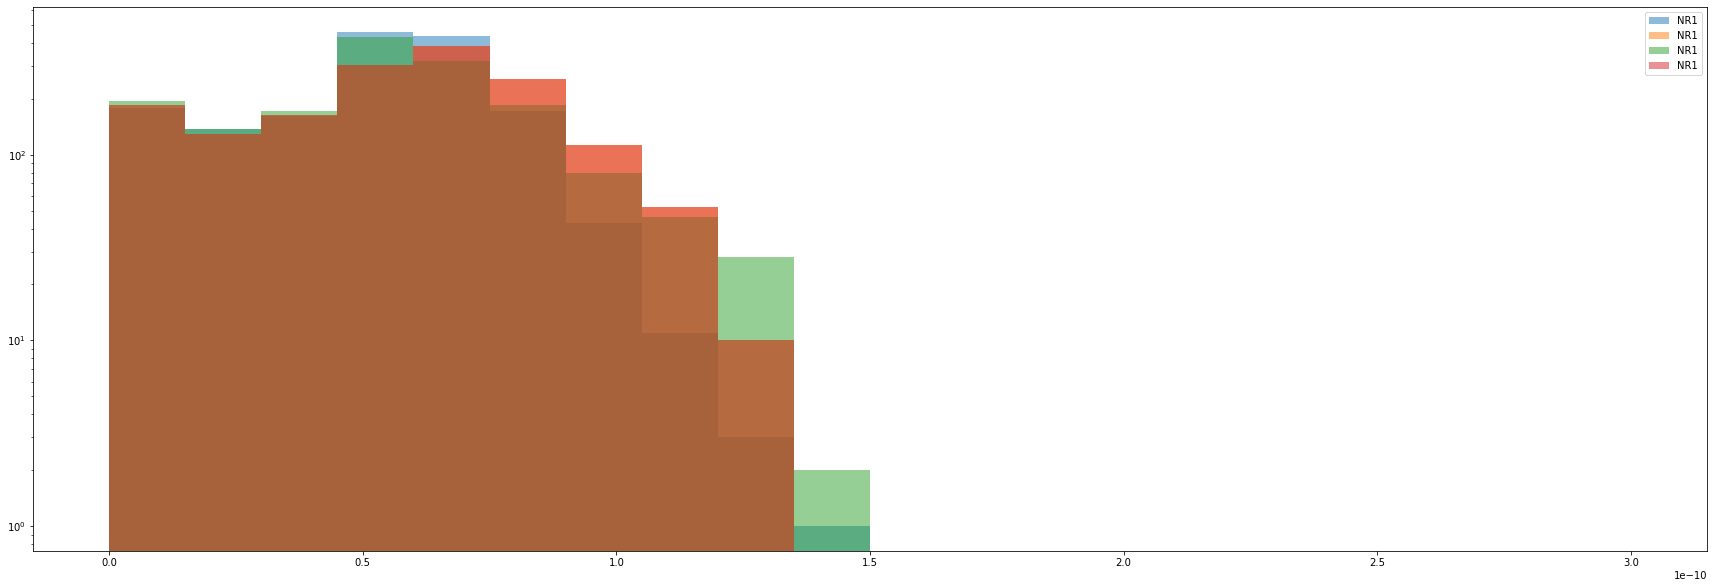

In [252]:
indexs = [6769, 6787, 6778, 6787]
for index in indexs:
    plt.hist(df['img_p'][index].reshape(-1), log=True, bins=20, range=(0, 3e-10), alpha=0.5, label=df['reaction_type'][index]+str(df['energy'][index]))
plt.legend()
plt.plot()

[]

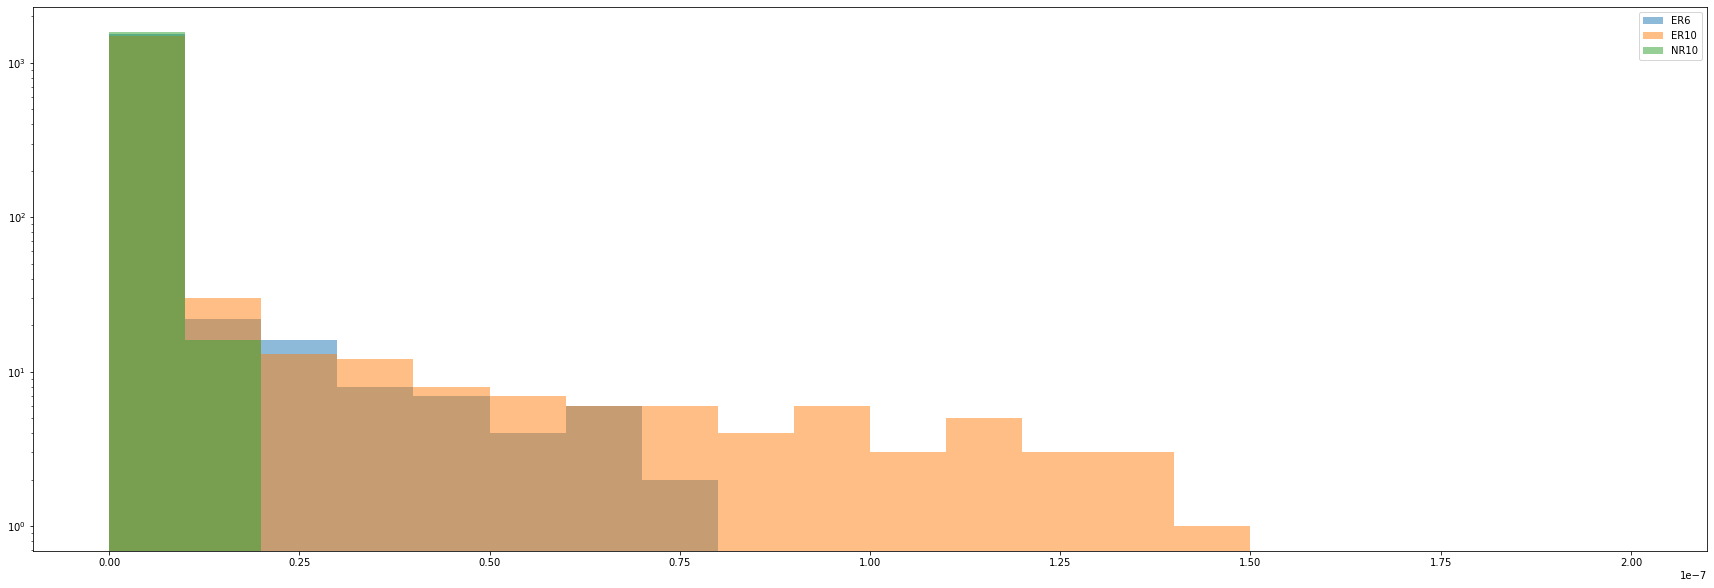

In [240]:
indexs = [5976, 3304, 12596]
for index in indexs:
    plt.hist(df['img_p'][index].reshape(-1), log=True, bins=20, range=(0, 2e-7), alpha=0.5, label=df['reaction_type'][index]+str(df['energy'][index]))
plt.legend()
plt.plot()

12596 1.354495715588655e-08
7751 2.031730694795897e-08
7751 2.031730694795897e-08
12596 1.354495715588655e-08
12596 1.354495715588655e-08
12596 1.354495715588655e-08
12596 1.354495715588655e-08
12596 1.354495715588655e-08
12596 1.354495715588655e-08
12596 1.354495715588655e-08


[]

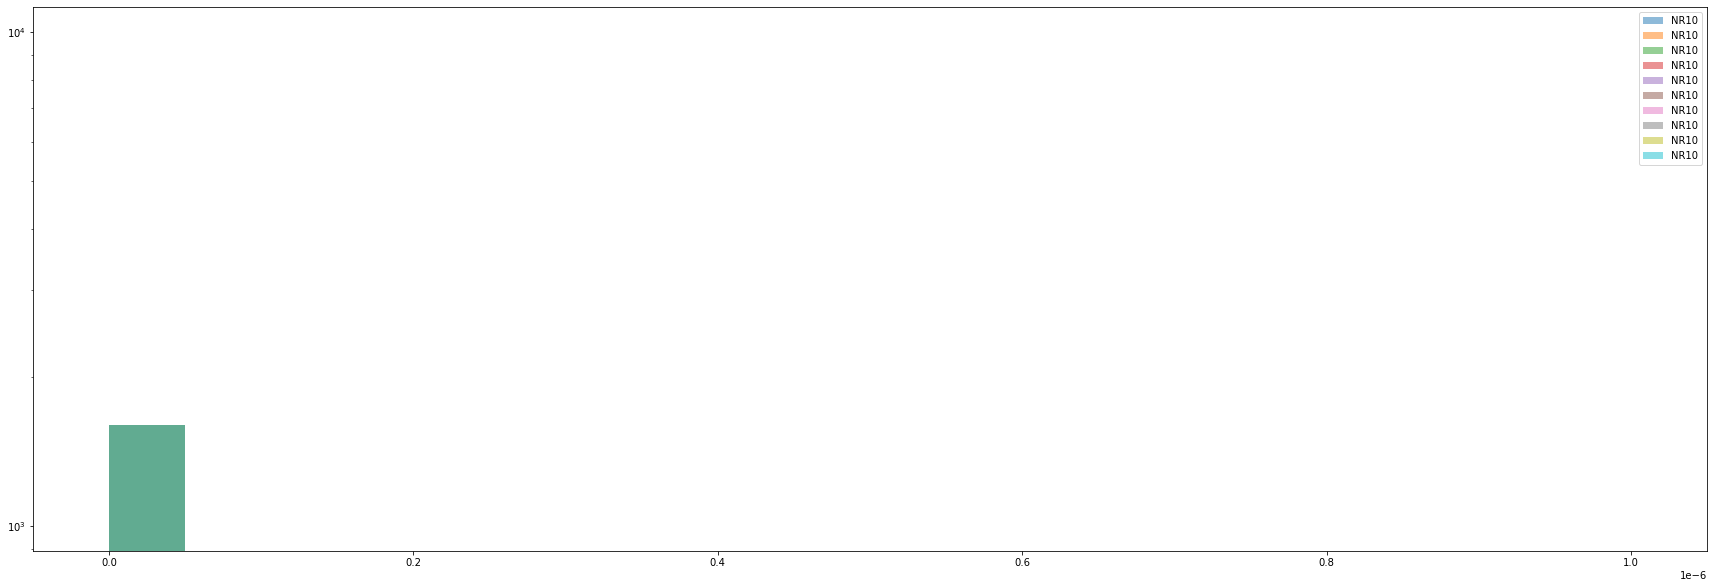

In [239]:
indexs = df[(df['energy']==10)&(df.reaction_type=='NR')].index.tolist()
for _ in range(10):
    index = random.choice(indexs)
    plt.hist(df['img_p'][index].reshape(-1), log=True, bins=20, range=(0, 1e-6), alpha=0.5, label=df['reaction_type'][index]+str(df['energy'][index]))
    if df['max'][index] < 5e-7:
        print(index, df['max'][index])
plt.legend()
plt.plot()

[]

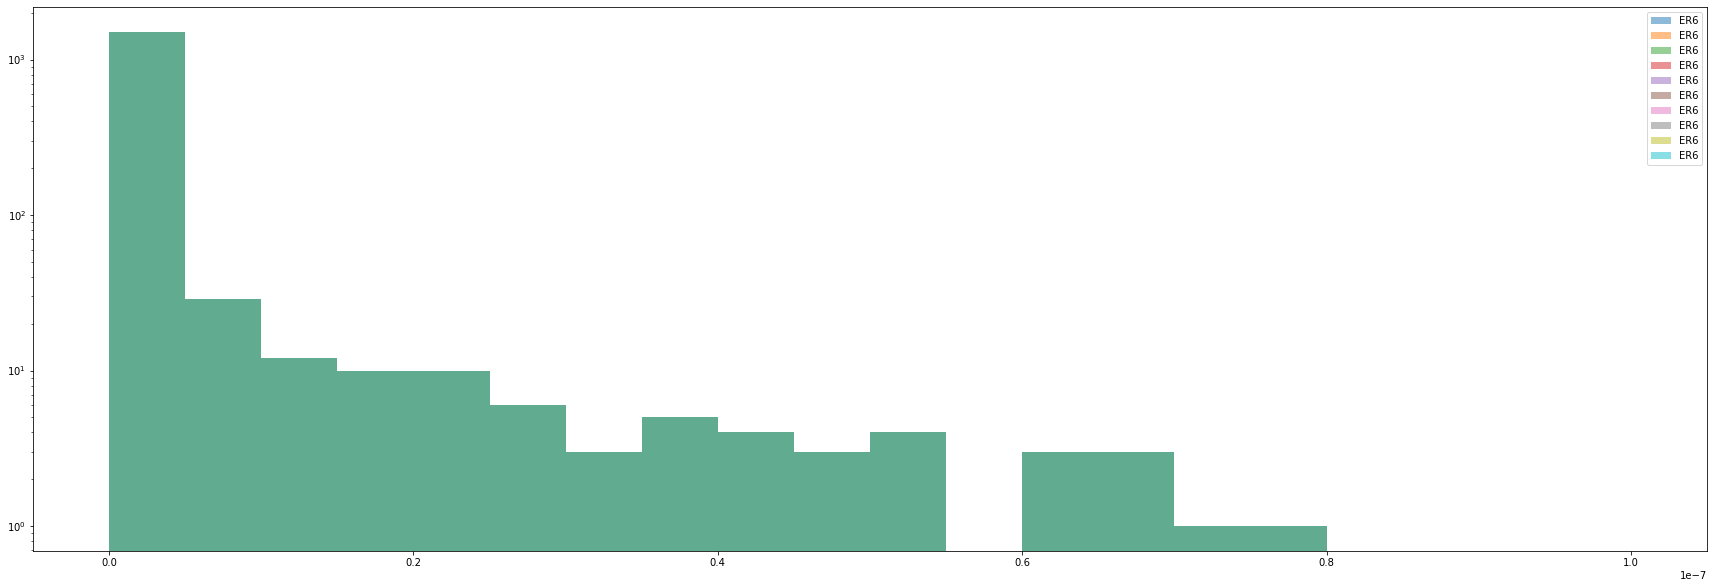

In [207]:
indexs = df[(df['energy']==6)&(df.reaction_type=='ER')].index.tolist()
for _ in range(10):
    index = random.choice(indexs)
    plt.hist(df['img_p'][index].reshape(-1), log=True, bins=20, range=(0, 1e-7), alpha=0.5, label=df['reaction_type'][index]+str(df['energy'][index]))
plt.legend()
plt.plot()

[]

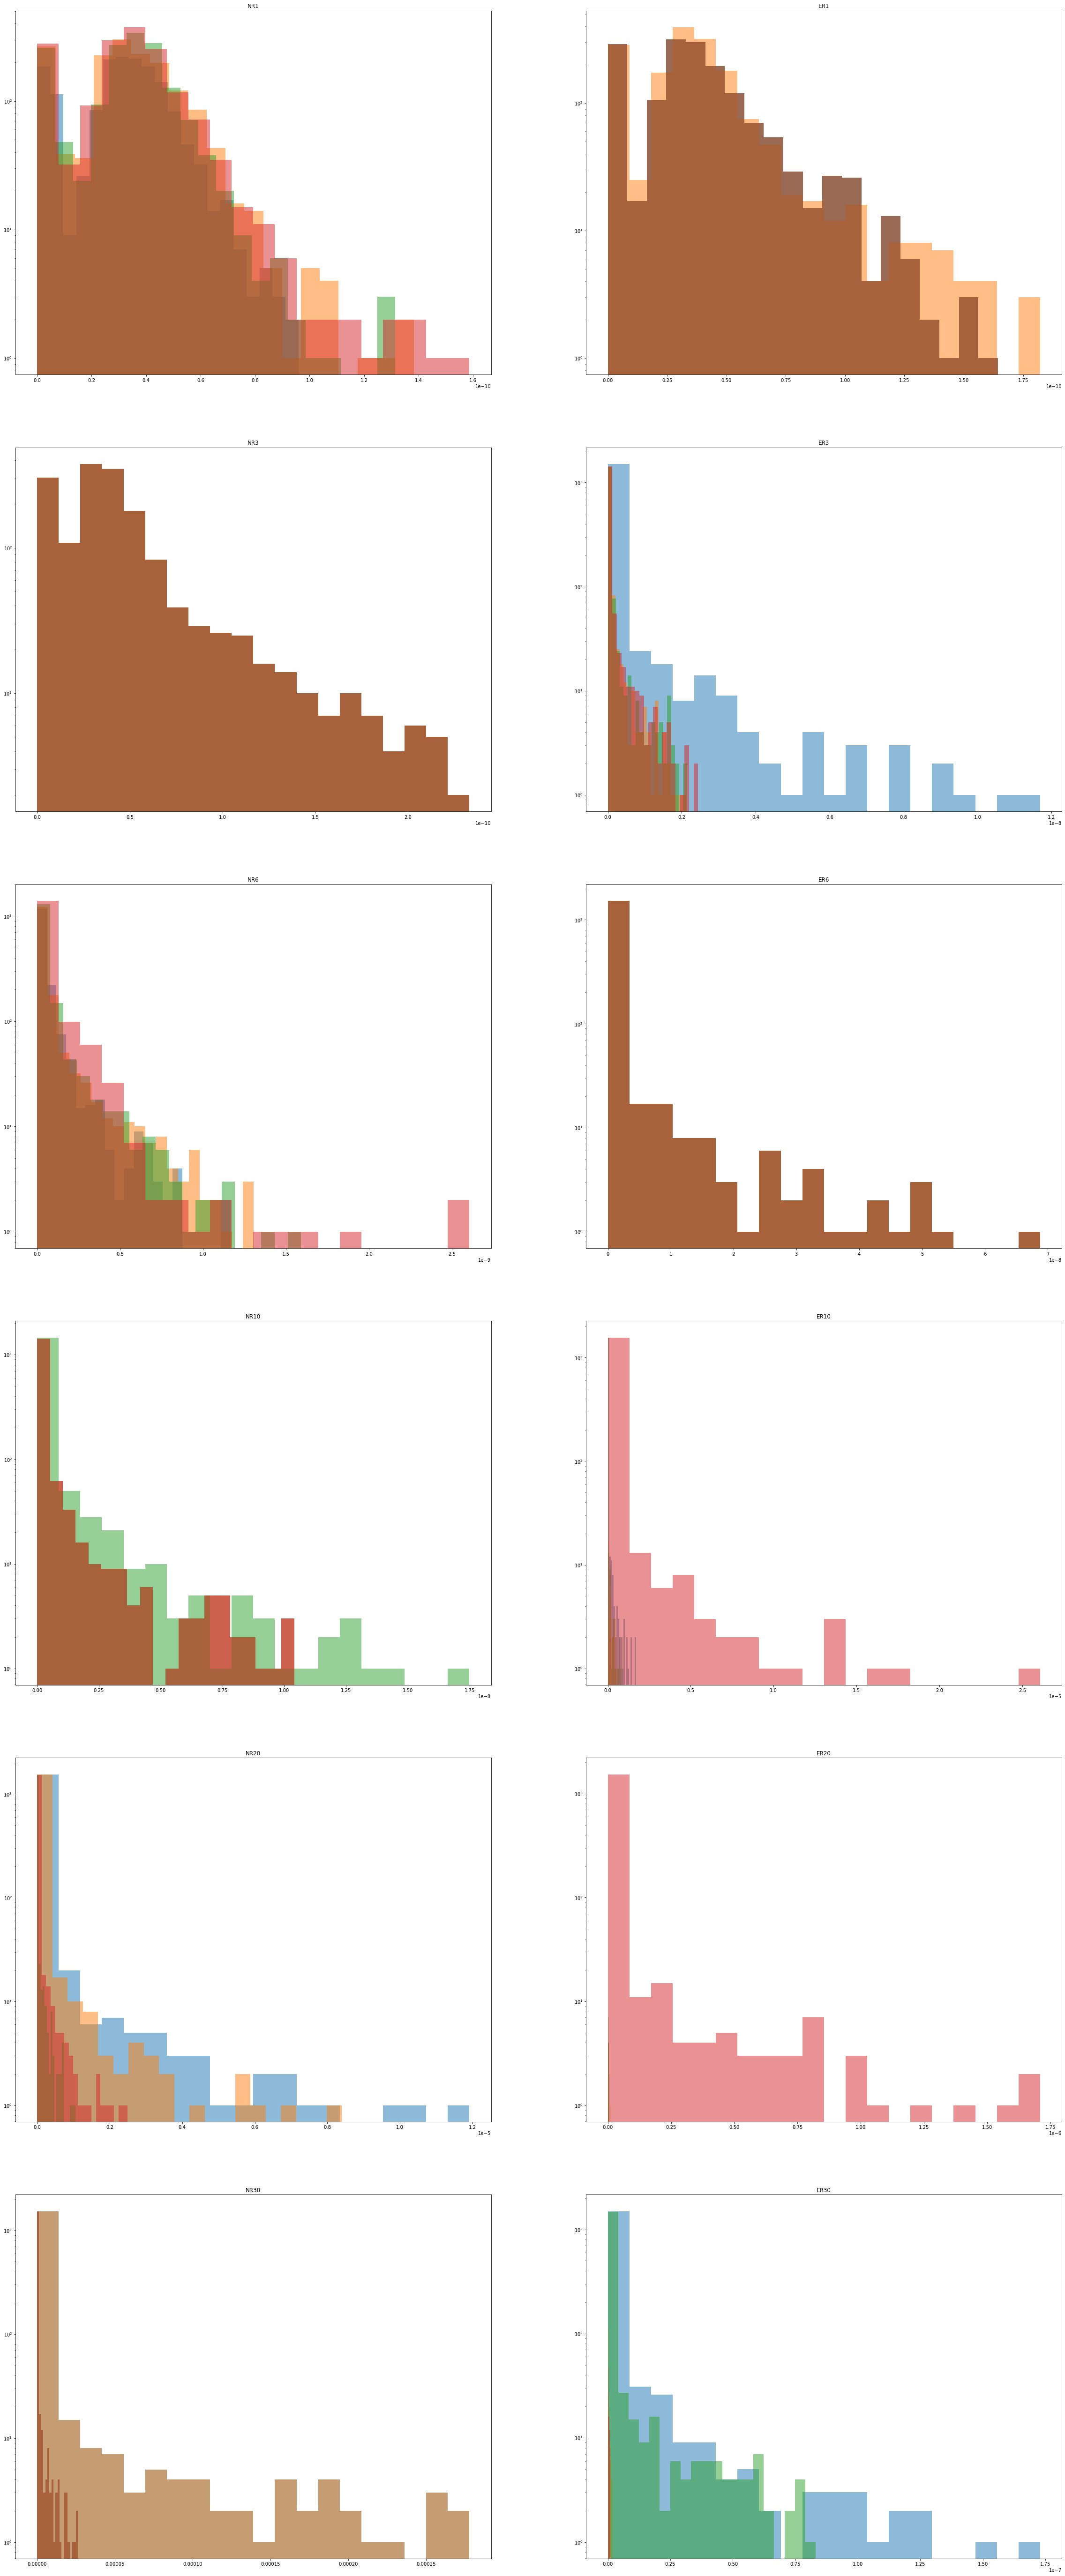

In [186]:
N = 4
ranges = [3e-10, 3e-9, 3e-8, 3e-7, 3e-7, 3e-7]


fig, axs = plt.subplots(6, 2, figsize=(40, 100))
for i, reaction_type in enumerate(['NR', 'ER']):
    for j, energy in enumerate([1, 3, 6, 10, 20, 30]):
        indexs = df[(df['energy']==energy)&(df.reaction_type==reaction_type)].index.tolist()
        for _ in range(N):
            index = random.choice(indexs)
            axs[j, i].hist(df['img_p'][index].reshape(-1), log=True, bins=20, range=(0, ranges[j]), alpha=0.5)
            axs[j, i].set_title(df['reaction_type'][index]+str(df['energy'][index]))
plt.plot()

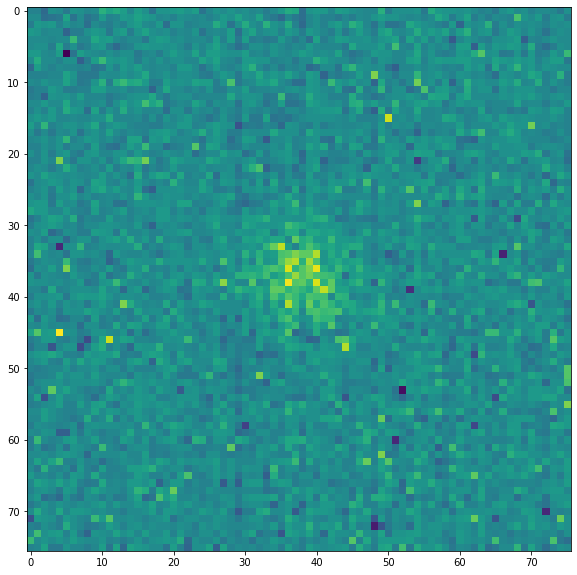

In [113]:
plt.imshow(df['img'][2][250:326,250:326])

In [479]:
df['sum'] = df['img'].map(lambda img: np.sum(img[260:316,260:316]))
df['max'] = df['img'].map(lambda img: np.max(img[260:316,260:316]))
df['std'] = df['img'].map(lambda img: np.std(img[260:316,260:316]))

In [480]:
df[df['energy']<20][['energy', 'max']].corr()

,energy,max
energy,1.000000,0.821367
max,0.821367,1.000000


<AxesSubplot:>

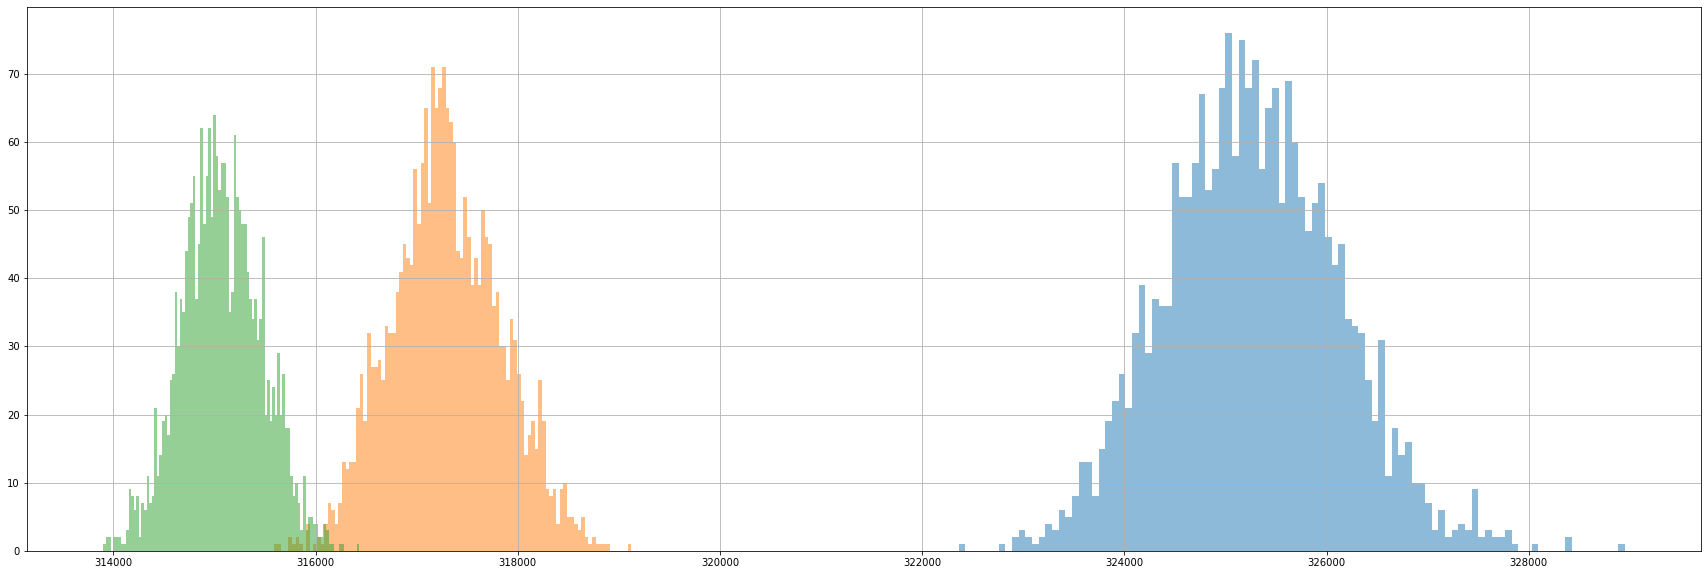

In [481]:
#df[(df['energy']==30)&(df.reaction_type=='ER')]['sum'].hist(bins=100, alpha=0.5)
#df[(df['energy']==20)&(df.reaction_type=='NR')]['sum'].hist(bins=100, alpha=0.5)
#df[(df['energy']==10)&(df.reaction_type=='ER')]['sum'].hist(bins=100, alpha=0.5)
df[(df['energy']==20)&(df.reaction_type=='NR')]['sum'].hist(bins=100, alpha=0.5)
df[(df['energy']==6)&(df.reaction_type=='NR')]['sum'].hist(bins=100, alpha=0.5)
df[(df['energy']==1)&(df.reaction_type=='NR')]['sum'].hist(bins=100, alpha=0.5)

<AxesSubplot:>

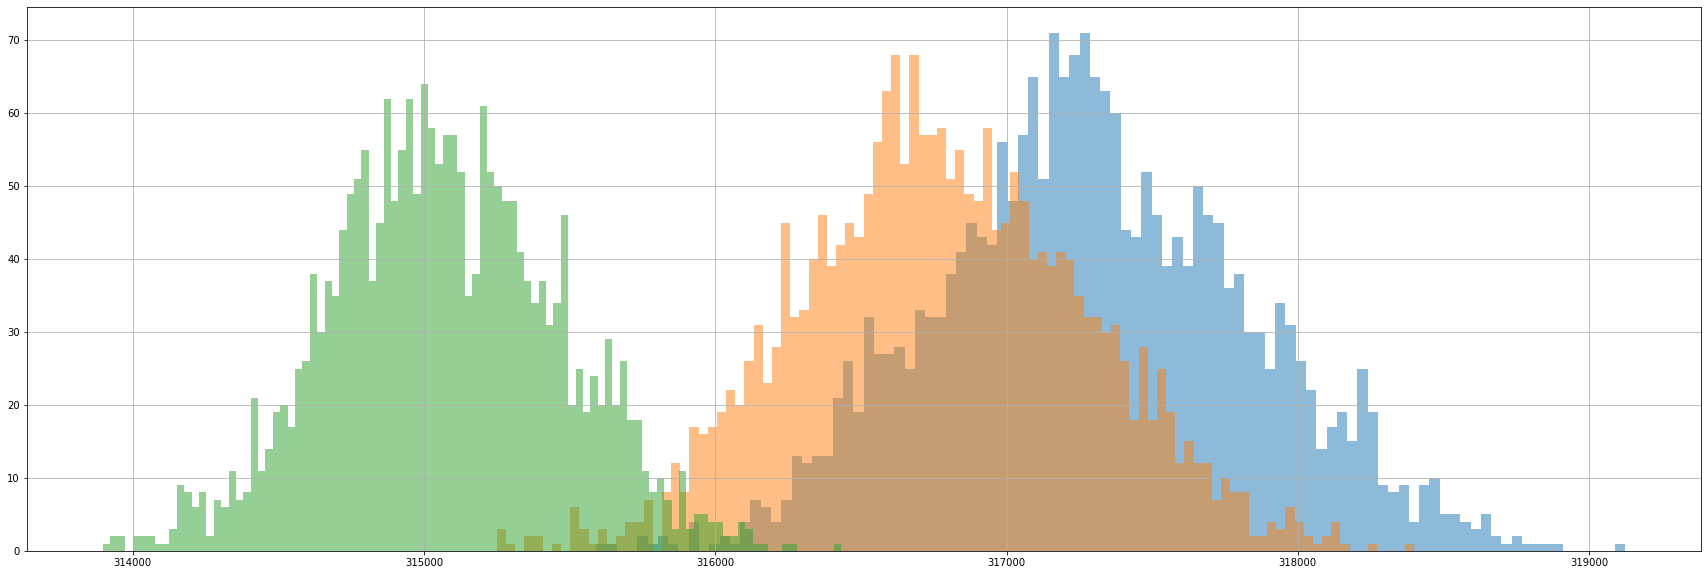

In [25]:
#df[(df['energy']==30)&(df.reaction_type=='ER')]['sum'].hist(bins=100, alpha=0.5)
#df[(df['energy']==20)&(df.reaction_type=='NR')]['sum'].hist(bins=100, alpha=0.5)
#df[(df['energy']==10)&(df.reaction_type=='ER')]['sum'].hist(bins=100, alpha=0.5)
df[(df['energy']==6)&(df.reaction_type=='NR')]['sum'].hist(bins=100, alpha=0.5)
df[(df['energy']==3)&(df.reaction_type=='ER')]['sum'].hist(bins=100, alpha=0.5)
df[(df['energy']==1)&(df.reaction_type=='NR')]['sum'].hist(bins=100, alpha=0.5)

In [34]:
df['img'][10][250:326,250:326]

array([[100.,  98.,  95., ...,  98., 105., 101.],
       [103., 102., 101., ..., 102., 101.,  99.],
       [ 99., 100., 103., ...,  98.,  99., 100.],
       ...,
       [100.,  88.,  99., ...,  98., 102., 106.],
       [103.,  97., 101., ...,  89., 100.,  85.],
       [102.,  97., 101., ..., 102., 100., 104.]], dtype=float32)

In [111]:
np.std(df['img'][10][250:326,250:326])

4.1013713

<AxesSubplot:>

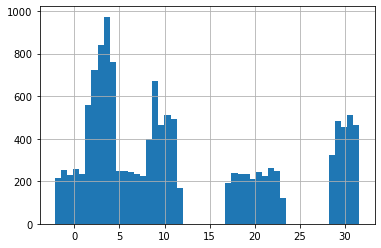

In [14]:
(df.offset+df.energy).hist(bins=50)

In [24]:
df[(df.offset+df.energy)<0].iloc[0].img

array([[101.,  99., 101., ...,  97.,  98., 100.],
       [102., 103., 103., ..., 101.,  94., 103.],
       [ 97., 101.,  99., ..., 101.,  98.,  98.],
       ...,
       [100., 101., 106., ...,  98., 101., 103.],
       [ 98.,  96., 102., ...,  95., 102., 103.],
       [100.,  98., 104., ..., 101., 101., 101.]], dtype=float32)